In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1>Times Data<h1>

In [2]:
timesData = pd.read_csv("timesData.csv")

In [3]:
timesData.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [4]:
timesData.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


In [5]:
timesData['year'].value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

In [6]:
timesData[timesData['university_name'] == 'Harvard University']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
201,2,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,"20,152",8.9,25%,NaN,2012
605,4,Harvard University,United States of America,94.9,63.7,98.6,99.2,39.9,93.6,"20,152",8.9,25%,NaN,2013
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016


In [7]:
timesData.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [8]:
def defineFemaleRatio(df):
    """
    Altera a coluna female_male_ratio para que mostre apenas a porcentagem de mulheres na universidade.
    Além disso, remove valores iguais a "-" e os salva como NaN.
    Dessa forma, fica mais fácil de analisar essa coluna. Retorna um novo dataframe sem alterar o df passado
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(df))
    for i in range(len(dfNovo)):
        if (not pd.isna(dfNovo.iloc[i,12])):
            if dfNovo.at[i,'female_male_ratio'] == '-':
                dfNovo.at[i,'female_male_ratio'] = np.nan
            else:
                dfNovo.at[i,'female_male_ratio'] = int(dfNovo.at[i,'female_male_ratio'].strip()[0:2])
    return dfNovo
            
def retiraPorcentagem(df):
    """
    Retira o símbolo de % da coluna 'international_students' e retorna um novo dataset sem modificar o original.
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        if (not pd.isna(dfNovo.iloc[i,11])):
            valorNovo = dfNovo.at[i,'international_students']
            if '%' in valorNovo:
                valorNovo = valorNovo[:-1]
            if valorNovo.strip() not in ['']:
                dfNovo.at[i,'international_students'] = int(valorNovo)
    return dfNovo

def retiraVirgulaNumAlunos(df):
    """
    df: Um dataframe
    Retira a vírgula que separa os números da coluna num_students e os converte para inteiro para que
    possam ser usados como dados em plots. Não altera o dataframe passado. Retorna um novo dataframe
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        if(not pd.isna(df.at[i,'num_students'])):
            dfNovo.at[i,'num_students'] = int(dfNovo.at[i,'num_students'].replace(',','',1))
    return dfNovo

def isFloat(value):
    """
    Retorna True se é possível converter o valor para float e False caso não seja possível
    """
    try:
        float(value)
        return True
    except ValueError:
        return False

def calculaTotalScore(linha):
    """
    linha: Um objeto Series contendo as seguintes colunas:
        teaching, international, research, citations, income e year
        
    Retorna o total_score (arredondado com 1 casa decimal) de uma universidade de acordo
    com as regras da Times. 
    Retorna -1 caso o valor em 'year' não esteja da faixa de (2011-2016) ou caso pelo menos uma das cinco
    categorias não tenha um valor float
    
    O peso de cada categoria varia por ano:
    
        2011:
            peso_teaching: 30%
            peso_income: 2.5%
            peso_citations: 32.5%
            peso_research: 30%
            peso_international: 5%
            
        2012,2013,2014,2015,2016:
            peso_teaching: 30%
            peso_income: 2.5%
            peso_citations: 30%
            peso_research: 30%
            peso_international: 7.5%
         
        total_score = {(teaching*peso_teaching) + (international * peso_international) +
                        (income * peso_income) + (citations * peso_citations) + 
                        (research * peso_research)}/(100)
    
    """
    peso_teaching = 30
    peso_income = 2.5
    peso_citations = 0
    peso_research = 30
    peso_international = 0
    teaching = 0
    income = 0
    citations = 0
    research = 0
    international = 0
    
    if(isFloat(linha['teaching'])):
        teaching = float(linha['teaching'])
    else:
        return -1.0
    
    if(isFloat(linha['income'])):
        income = float(linha['income'])
    else:
        return -1.0
    
    if(isFloat(linha['citations'])):
        citations = float(linha['citations'])
    else:
        return -1.0
    
    if(isFloat(linha['research'])):
        research = float(linha['research'])
    else:
        return -1.0
    
    if(isFloat(linha['international'])):
        international = float(linha['international'])
    else:
        return -1.0
    
    if int(linha['year']) == 2011:
        peso_citations = 32.5
        peso_international = 5
    elif int(linha['year']) in [2012,2013,2014,2015,2016]:
        peso_citations = 30
        peso_international = 7.5
    else:
        return -1.0
    
    total_score = ((teaching*peso_teaching) + (international * peso_international) +
                        (income * peso_income) + (citations * peso_citations) + 
                        (research * peso_research))/(100)
    return float(round(total_score,1))

def completaTotalScores(df):
    """
    df: Um dataframe
    Calcula a nota final de cada universidade se for possível. Caso não seja possível, -1 é colocado como nota.
    Retorna um novo dataframe sem alterar o df passado
    """
    dfNovo = df.copy()
    dfNovo.index = range(len(dfNovo))
    for i in range(len(dfNovo)):
        novaNota = 0
        novaNota = calculaTotalScore(dfNovo.iloc[i])
        dfNovo.at[i,'total_score'] = novaNota
    return dfNovo

def arrumaNomePaises(df):
    """
    Arruma o nome de células que estão com:
    'Unisted States of America' para 'United States of America'
    'Unted Kingdom' para 'United Kingdom'
    """
    dfNovo = df.copy()

    #Index de quem tem o nome 'Unisted States of America'
    idxEUA = dfNovo.index[dfNovo['country'] == 'Unisted States of America']
    for i in range(len(idxEUA)):
        dfNovo.at[idxEUA[i],'country'] = 'United States of America'
    
    #Index de quem tem o nome 'Unted Kingdom'
    idxUK = dfNovo.index[dfNovo['country'] == 'Unted Kingdom']
    for i in range(len(idxUK)):
        dfNovo.at[idxUK[i],'country'] = 'United Kingdom'
    return dfNovo

def dropRows(df,col_name='total_score',value=-1):
    """
    Deleta as linhas da tabela cujo valor na coluna informada é igual ao valor informado.
    df = O DataFrame utilizado
    col_name: O nome da coluna do DataFrame a ser analisado (default: total_score)
    value: O valor a ser usado na comparação (default: -1)
    """
    dfNovo = df.copy()
    dfNovo = dfNovo.drop(dfNovo[dfNovo[col_name] == value].index)
    return dfNovo
    

def trataDadosTimes(df):
    """
    df: Um dataframe, de preferência, o dataset da times original.
    Trata os dados do dataset de acordo com todas as regras existentes que devem ser aplicadas até agora.
    Retorna um novo dataframe sem alterar o original.
    """
    dfNovo = completaTotalScores(df)
    dfNovo = retiraPorcentagem(dfNovo)
    dfNovo = retiraVirgulaNumAlunos(dfNovo)
    dfNovo = defineFemaleRatio(dfNovo)
    dfNovo = arrumaNomePaises(dfNovo)
    dfNovo = dropRows(dfNovo)
    return dfNovo

In [9]:
#Tratando os dados da times
dfTimesData = trataDadosTimes(timesData)

In [10]:
dfTimesData[dfTimesData['total_score'] == -1].shape

(0, 14)

<h1>Separando os países em regiões</h1>

In [11]:
#Latin America Countries
LTCountries = ["Argentina","Brazil","Chile","Colombia","Mexico"]
#North America Countries
NACountries = ["Canada","United States of America"]
#European Countries without Cyprus
EUCountries = ['Austria','Belarus','Belgium','Czech Republic','Denmark',
               'Estonia','Finland','France','Germany','Greece','Hungary',
               'Iceland','Italy','Latvia','Lithuania','Luxembourg',
               'Netherlands','Norway','Poland','Portugal','Republic of Ireland',
               'Romania','Russian Federation','Serbia','Slovakia',
               'Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom']
#African Countries without Egypt
AFCountries = ['Ghana','Kenya','Morocco','Nigeria','South Africa','Uganda']
#Middle Eastern Countries
MECountries = ['Egypt','Cyprus','Iran','Israel','Jordan','Lebanon',
               'Oman','Qatar','Saudi Arabia','Turkey','United Arab Emirates']
#Asian Countries
ASCountries = ['Bangladesh','China','Hong Kong','India','Indonesia','Japan',
               'Macau','Malaysia','Pakistan','Singapore','South Korea','Taiwan','Thailand']
#Oceania Countries
OCCountries = ['Australia','New Zealand']

In [12]:
LatinDataMF   = dfTimesData[dfTimesData['country'].isin(LTCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
LatinDataIS   = dfTimesData[dfTimesData['country'].isin(LTCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
NorAmeDataMF  = dfTimesData[dfTimesData['country'].isin(NACountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
NorAmeDataIS  = dfTimesData[dfTimesData['country'].isin(NACountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
EuropeDataMF  = dfTimesData[dfTimesData['country'].isin(EUCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
EuropeDataIS  = dfTimesData[dfTimesData['country'].isin(EUCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AfricanDataMF = dfTimesData[dfTimesData['country'].isin(AFCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AfricanDataIS = dfTimesData[dfTimesData['country'].isin(AFCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
MidEastDataMF = dfTimesData[dfTimesData['country'].isin(MECountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
MidEastDataIS = dfTimesData[dfTimesData['country'].isin(MECountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AsianDataMF   = dfTimesData[dfTimesData['country'].isin(ASCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
AsianDataIS   = dfTimesData[dfTimesData['country'].isin(ASCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
OceaniaDataMF = dfTimesData[dfTimesData['country'].isin(OCCountries)][['female_male_ratio','year']].dropna().astype({'female_male_ratio':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()
OceaniaDataIS = dfTimesData[dfTimesData['country'].isin(OCCountries)][['international_students','year']].dropna().astype({'international_students':'int64', 'year':'str'}).groupby(['year'], as_index=False).mean()

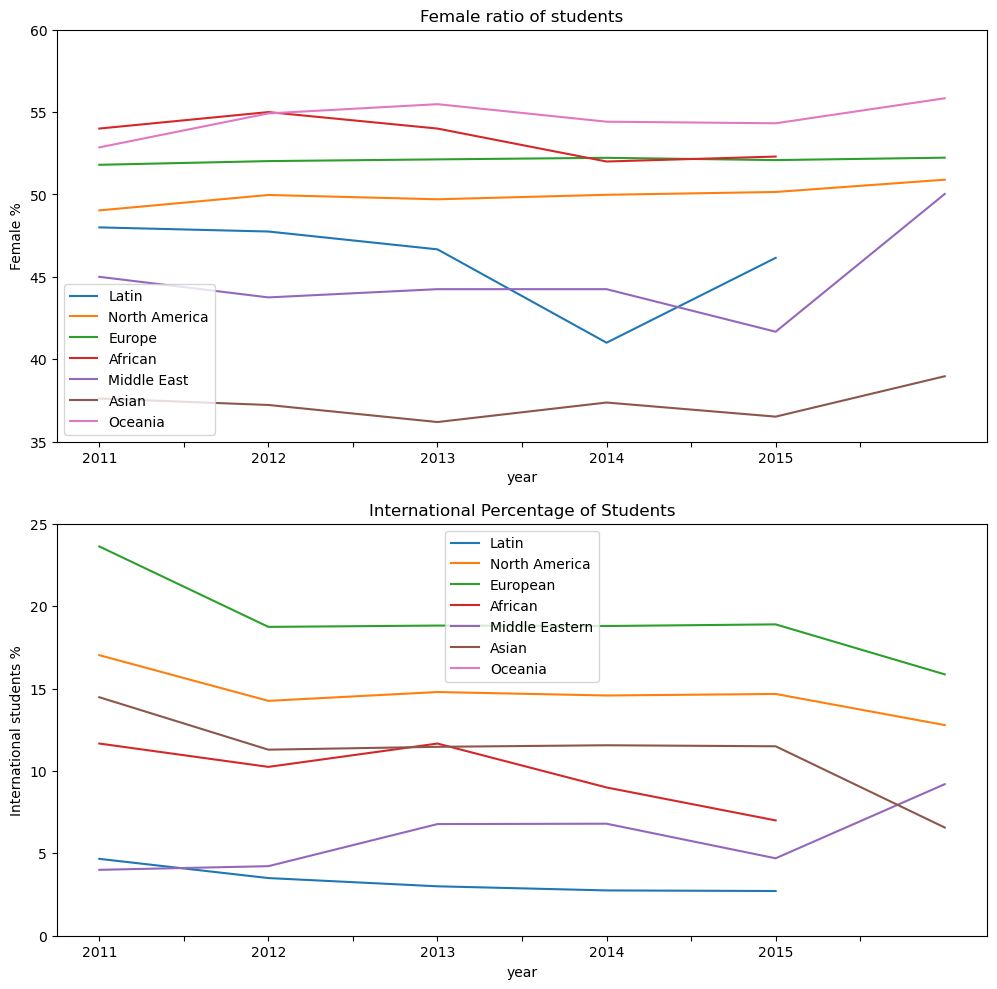

In [13]:
fig, axes = plt.subplots(figsize=(12,12), dpi=100, nrows=2 , sharex=False, sharey=False)
LatinDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
NorAmeDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
EuropeDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
AfricanDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
MidEastDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
AsianDataMF.plot(x='year', y='female_male_ratio', ylim=(35,60), ax=axes[0])
OceaniaDataMF.plot(x='year', y='female_male_ratio', ylim=(35, 60), ax=axes[0])
axes[0].legend(['Latin', 'North America', 'Europe', 'African', 'Middle East', 'Asian', 'Oceania'])
axes[0].set_title("Female ratio of students")
axes[0].set_ylabel("Female %")
LatinDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
NorAmeDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
EuropeDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
AfricanDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
MidEastDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
AsianDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
OceaniaDataIS.plot(x='year', y='international_students', ylim=(0,25), ax=axes[1])
axes[1].set_title("International Percentage of Students")
axes[1].set_ylabel("International students %")
axes[1].legend(['Latin', 'North America', 'European', 'African', 'Middle Eastern', 'Asian', 'Oceania'])

In [14]:
dfTimesData.loc[2019]

world_rank                                       201-250
university_name           University of Hawai’i at Mānoa
country                         United States of America
teaching                                              32
international                                       63.4
research                                            35.5
citations                                           67.7
income                                              44.7
total_score                                         46.4
num_students                                         NaN
student_staff_ratio                                  NaN
international_students                               NaN
female_male_ratio                                    NaN
year                                                2016
Name: 2019, dtype: object

In [15]:
dfTimesData.describe()

,teaching,research,citations,student_staff_ratio,year
count,2380.000000,2380.000000,2380.000000,2334.000000,2380.000000
mean,37.051303,35.398025,60.393739,18.600728,2014.166807
std,17.247656,20.864358,23.019769,11.343627,1.644124
min,9.900000,5.400000,1.200000,0.600000,2011.000000
25%,24.475000,19.600000,45.100000,12.200000,2013.000000
50%,33.000000,30.100000,61.750000,16.200000,2014.000000
75%,45.125000,46.125000,78.300000,21.900000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [16]:
dfTimesData.head(3)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152,8.9,25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243,6.9,27,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.5,11074,9.0,33,37,2011


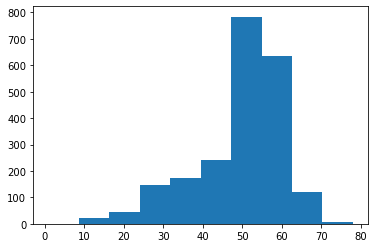

In [17]:
dfTimesData['female_male_ratio'].hist(grid=False,bins=10)

In [18]:
nomesPaises = list(dfTimesData['country'].unique())
#sorted(nomesPaises,key=str.upper)

In [19]:
sum = len(LTCountries) + len(NACountries)
sum += len(EUCountries) + len(AFCountries)
sum += len(MECountries) + len(ASCountries)
sum += len(OCCountries)
if sum == len(nomesPaises):
    print("Deu certo")
else:
    print(sum)
    print(len(nomesPaises))

70
67


In [20]:
"""
Conferindo se todos os países foram mapeados
"""
"""
for i in range(len(nomesPaises)):
    inLT = nomesPaises[i] in LTCountries
    inNA = nomesPaises[i] in NACountries
    inEU = nomesPaises[i] in EUCountries
    inAF = nomesPaises[i] in AFCountries
    inME = nomesPaises[i] in MECountries
    inAS = nomesPaises[i] in ASCountries
    inOC = nomesPaises[i] in OCCountries
    if (not (inLT or inNA or inEU or inAF or inME or inAS or inOC)):
        print(nomesPaises[i])
"""

'\nfor i in range(len(nomesPaises)):\n    inLT = nomesPaises[i] in LTCountries\n    inNA = nomesPaises[i] in NACountries\n    inEU = nomesPaises[i] in EUCountries\n    inAF = nomesPaises[i] in AFCountries\n    inME = nomesPaises[i] in MECountries\n    inAS = nomesPaises[i] in ASCountries\n    inOC = nomesPaises[i] in OCCountries\n    if (not (inLT or inNA or inEU or inAF or inME or inAS or inOC)):\n        print(nomesPaises[i])\n'

In [21]:
dfTimesData[dfTimesData['female_male_ratio'] < 15][['university_name','female_male_ratio','num_students','year']]

,university_name,female_male_ratio,num_students,year
112,Tokyo Institute of Technology,13,9586,2011
307,Tokyo Institute of Technology,13,9586,2012
579,Polytechnic University of Catalonia,12,22893,2012
730,Tokyo Institute of Technology,13,9586,2013
1126,Tokyo Institute of Technology,13,9586,2014
1361,Indian Institute of Technology Kanpur,13,6167,2014
1544,Tokyo Institute of Technology,13,9586,2015
1760,Ewha Womans University,10,17625,2015
2050,Tokyo Institute of Technology,13,9586,2016
2227,Ewha Womans University,10,17625,2016


In [22]:
dfTimesData[dfTimesData['female_male_ratio'] > 70][['university_name','country','female_male_ratio','num_students','year']]

,university_name,country,female_male_ratio,num_students,year
2036,Royal Veterinary College,United Kingdom,77,1819,2016
2037,Rush University,United States of America,71,1855,2016
2388,Soochow University,China,78,36465,2016
2398,United Arab Emirates University,United Arab Emirates,76,9221,2016
2404,Adam Mickiewicz University,Poland,71,40633,2016
2413,Anadolu University,Turkey,78,379231,2016
2540,Qatar University,Qatar,74,9583,2016


In [23]:
dfTimesData[dfTimesData['university_name'] == 'Pontifical Catholic University of Paraná']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2536,601-800,Pontifical Catholic University of Paraná,Brazil,18.4,18.6,6.5,32.2,28.0,19.2,7741,10.9,2,1,2016


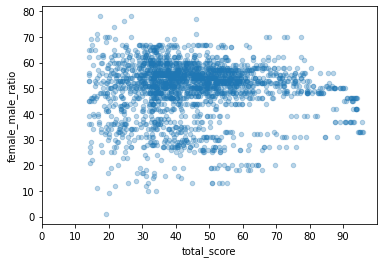

In [24]:
dfTimesData.plot.scatter(x=8,y=12,xticks=range(0,100,10),xlim=(0,100),alpha=0.3)

In [25]:
LTData = dfTimesData[dfTimesData['country'].isin(LTCountries)]
EUData = dfTimesData[dfTimesData['country'].isin(EUCountries)]
NAData = dfTimesData[dfTimesData['country'].isin(NACountries)]
AFData = dfTimesData[dfTimesData['country'].isin(AFCountries)]
MEData = dfTimesData[dfTimesData['country'].isin(MECountries)]
ASData = dfTimesData[dfTimesData['country'].isin(ASCountries)]
OCData = dfTimesData[dfTimesData['country'].isin(OCCountries)]

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação')

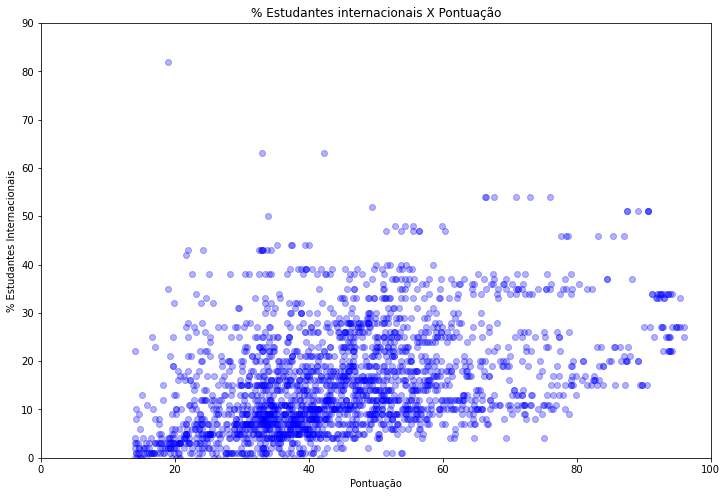

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(y=dfTimesData['international_students'],x=dfTimesData['total_score'],c='blue',alpha=0.3)
plt.xlim((0,100))
plt.ylim((0,90))
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação países Latino Americanos')

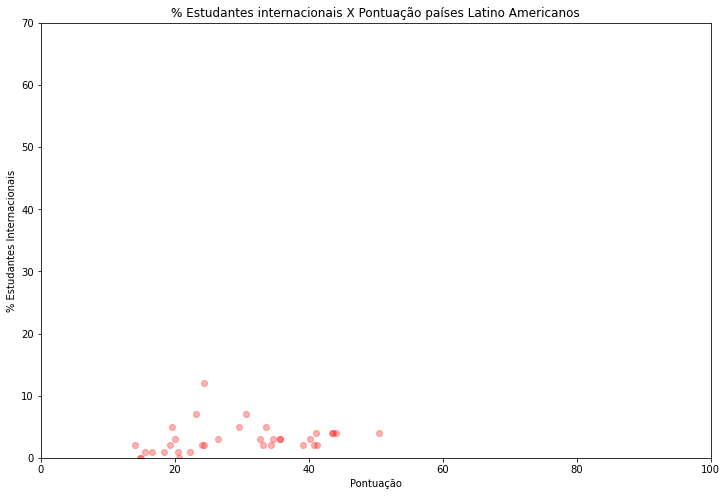

In [27]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,70))
plt.scatter(y=LTData['international_students'],x=LTData['total_score'],c='red',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação países Latino Americanos")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação países europeus')

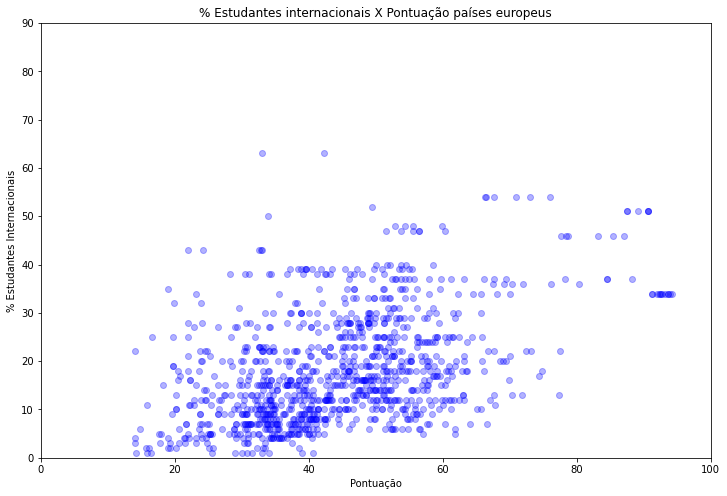

In [28]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=EUData['international_students'],x=EUData['total_score'],c='blue',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação países europeus")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação países norte americanos')

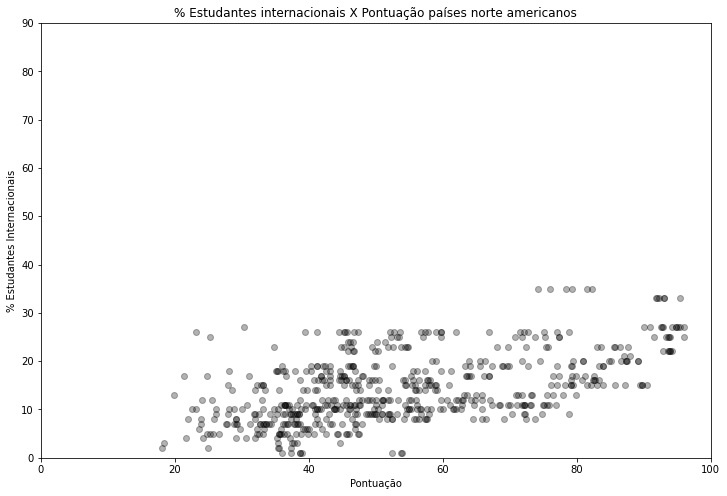

In [29]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=NAData['international_students'],x=NAData['total_score'],c='black',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação países norte americanos")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação países africanos')

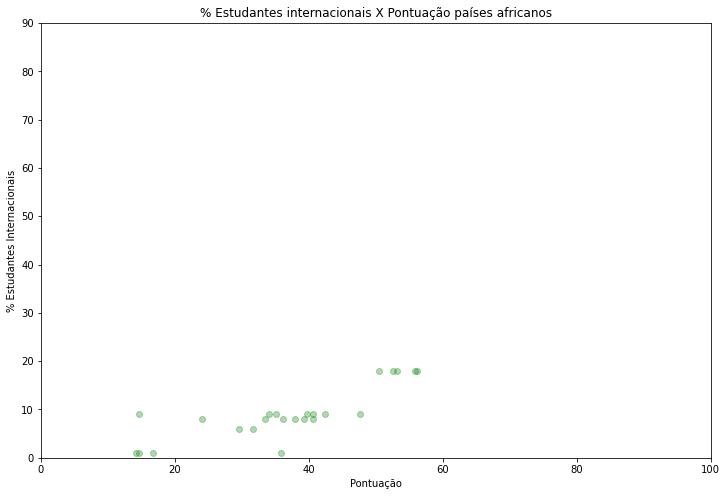

In [30]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=AFData['international_students'],x=AFData['total_score'],c='green',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação países africanos")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação países oriente médio')

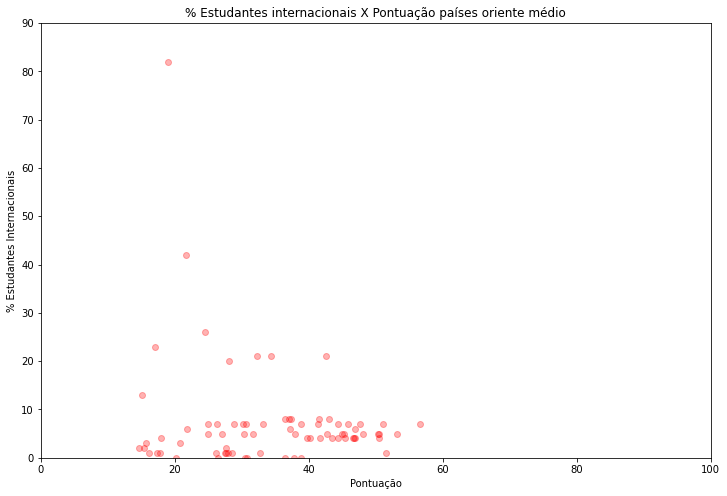

In [31]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=MEData['international_students'],x=MEData['total_score'],c='red',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação países oriente médio")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação países asiáticos')

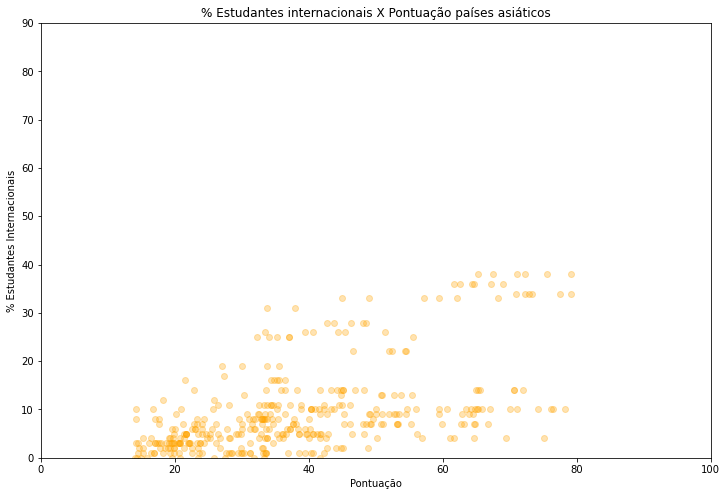

In [32]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=ASData['international_students'],x=ASData['total_score'],c='orange',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação países asiáticos")

Text(0.5, 1.0, '% Estudantes internacionais X Pontuação oceania')

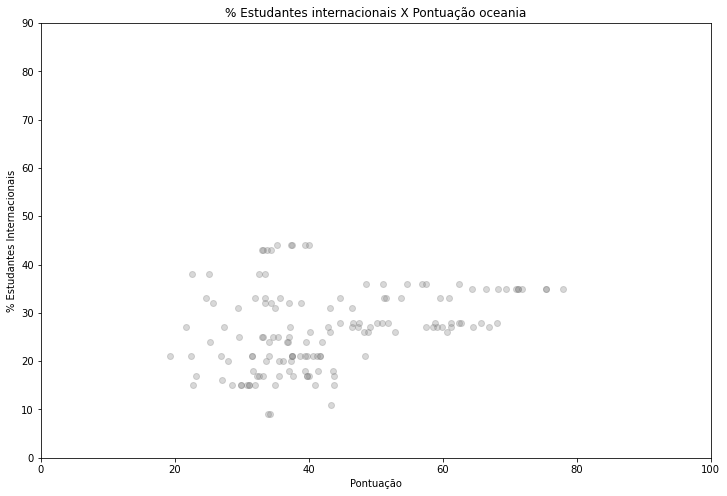

In [33]:
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=OCData['international_students'],x=OCData['total_score'],c='grey',alpha=0.3)
plt.xlabel("Pontuação")
plt.ylabel("% Estudantes Internacionais")
plt.title("% Estudantes internacionais X Pontuação oceania")

In [34]:
dfTimesData['international_students'].max()
dfTimesData[dfTimesData['international_students']==82]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2411,601-800,American University of Sharjah,United Arab Emirates,12.4,95.6,10.6,13.3,33.3,18.9,5226,14.1,82,48,2016


# Comparação de Intervalo de confiança
### Grupo A: Universidades com menos de 15% de alunos internacionais
### Grubo B: Universidades com pelo menos 15% de alunos internacionais

Hipótese nula: Na população, a distribuição da pontuação final é a mesma para universidades com menos de 15% de alunos internacionais e para universidades com pelo menos 15% de alunos internacionais.

Hipótese alternativa: A pontuação final de universidades com pelo menos 15% de alunos internacionais é maior, na média, do que universidades com menos de 15% de alunos internacionais.

In [35]:
gp_A = dfTimesData[dfTimesData['international_students'] < 15]
gp_B = dfTimesData[dfTimesData['international_students'] >= 15]
mediaA = gp_A['total_score'].mean()
mediaB = gp_B['total_score'].mean()
print("Média das notas do grupo A: {}".format(mediaA))
print("Média das notas do grupo B: {}".format(mediaB))
print("Média do grupo A - média do grupo B: {}".format(mediaA - mediaB))
print("Número de universidades do grupo A: {}".format(gp_A.shape[0]))
print("Número de universidades do grupo B: {}".format(gp_B.shape[0]))

Média das notas do grupo A: 39.56991221069429
Média das notas do grupo B: 51.56483720930227
Média do grupo A - média do grupo B: -11.994924998607978
Número de universidades do grupo A: 1253
Número de universidades do grupo B: 1075


In [36]:
def percentile(data, init, final):
    """
    Retorna uma lista informando o valor inferior e superior dos percentis requisitados
    data: A lista contendo os dados
    init: O percentil inferior
    final: O percentil superior
    """
    inferior = np.percentile(data,init)
    superior = np.percentile(data,final)
    return [inferior, superior]

### Via Permutação

Diferença entre a média das notas entre o grupo A e o grupo B: -11.994924998607978


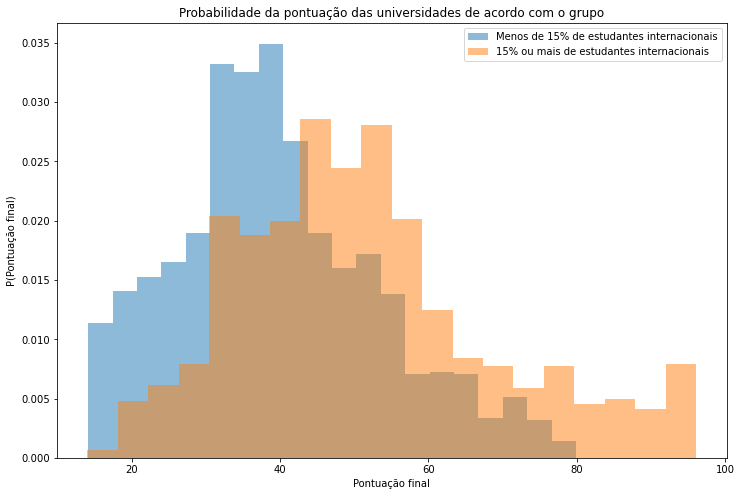

In [37]:
alpha_v = 0.5
plt.figure(figsize=(12,8))
plt.hist(gp_A['total_score'],density=True,alpha=alpha_v,label="Menos de 15% de estudantes internacionais",bins=20)
plt.hist(gp_B['total_score'],density=True,alpha=alpha_v,label="15% ou mais de estudantes internacionais",bins=20)
plt.ylabel("P(Pontuação final)")
plt.xlabel("Pontuação final")
plt.title("Probabilidade da pontuação das universidades de acordo com o grupo")
plt.legend()
print("Diferença entre a média das notas entre o grupo A e o grupo B: {}".format(mediaA - mediaB))

Parece que a distribuição de pontuação das universidades que tem pelo menos 15% de alunos internacionais está mais a direita do que as universidades com menos do que 15% de alunos internacionais.

### Permutando os grupos

In [38]:
dfTimesCopy = dfTimesData.copy()

In [39]:
#Criando a coluna do grupo dos dados
possui_mais_de_15 = [x >=15 for x in dfTimesCopy['international_students']]
dfTimesCopy['mais_de_15'] = possui_mais_de_15 
dfTimesCopy = dfTimesCopy.drop(labels=['world_rank','country','teaching','international',
                         'research','citations','income','num_students','student_staff_ratio',
                        'female_male_ratio','year'],axis=1)

In [40]:
def permuteECalculeDiferenca(df,group_col='mais_de_15',mean_col='total_score'):
    """
    Permuta uma dada coluna que contém True ou False e retorna a diferença entre as médias dos grupos True e False 
    dado uma coluna alvo. Não altera o df original
    df: O DataFrame
    group_col = O nome da coluna que contém apenas True ou False a ser permutada. default = mais_de_15
    mean_col = O nome da coluna alvo a ser comparado as médias entre os dois grupos. default = total_score
    return: A diferença da média entre o grupo que é False e o grupo True na coluna alvo
    """
    dfCopy = df.copy()
    col_perm_name = group_col+'_perm' 
    dfCopy[col_perm_name] = list(np.random.permutation(dfCopy[group_col].values))
    grupo_A = dfCopy[~dfCopy[col_perm_name]]
    grupo_B = dfCopy[dfCopy[col_perm_name]]
    media_A = grupo_A[mean_col].mean()
    media_B = grupo_B[mean_col].mean()
    return media_A - media_B

print(permuteECalculeDiferenca(dfTimesCopy))

1.3633908937003767


In [41]:
def meansDiff(df, group_col='mais_de_15',mean_col='total_score'):
    """
    Retorna um array contendo 5000 diferenças entre as médias de dada coluna de acordo 
    com dois grupos diferentes.
    df: O DataFrame
    group_col: O nome da coluna em df que contém True ou False indicando tal linha pertencer ou não ao grupo. 
        default = mais_de_15 
    mean_col: O nome da coluna de onde a diferença entre as médias dos grupos será calculada.
        default = total_score
    """
    repeticoes = 5000
    diferencas = np.zeros(repeticoes)
    for i in range(repeticoes):
        diferencas[i] = permuteECalculeDiferenca(df, group_col, mean_col)
    return diferencas

In [42]:
diferencas = meansDiff(dfTimesCopy,group_col='mais_de_15',mean_col='total_score')
diff_percentil  = percentile(diferencas,2.5,97.5)

Média do grupo A - média do grupo B: -11.994924998607978
2.5%: -1.349677626303164, 97.5%: 1.3223479283614408


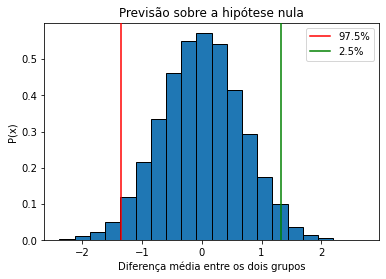

In [43]:
plt.hist(diferencas,density=True,bins=20, edgecolor='black', linewidth=1.0)
plt.ylabel("P(x)")
plt.xlabel("Diferença média entre os dois grupos")
plt.title("Previsão sobre a hipótese nula")
plt.axvline(x=diff_percentil[0],c='red',label='97.5%',zorder=5)
plt.axvline(x=diff_percentil[1],c='green',label='2.5%',zorder=5)
plt.legend()
print("Média do grupo A - média do grupo B: {}".format(mediaA - mediaB))
print("2.5%: {}, 97.5%: {}".format(diff_percentil[0],diff_percentil[1]))

Pode-se observar que, caso a pontuação final das universidades estivesse aleatóriamente distribuida para o grupo A (menos do 15% de alunos internacionais) e grupo B (pelo menos 15% de alunos internacionais), a diferença das médias entre os grupos ficaria, com 95% de certeza, entre -1.31 e 1.37. Analisando a diferença entre a média real, que foi de -11.99, temos um sinal de que a pontuação final das universidades não é aleatória com base no número de alunos internacionais.

### Calculando IC de pontuação total para os dois grupos via bootstrap

Text(0.5, 1.0, 'Comparação entre a % de estudantes internacionais de universidades e sua pontuação')

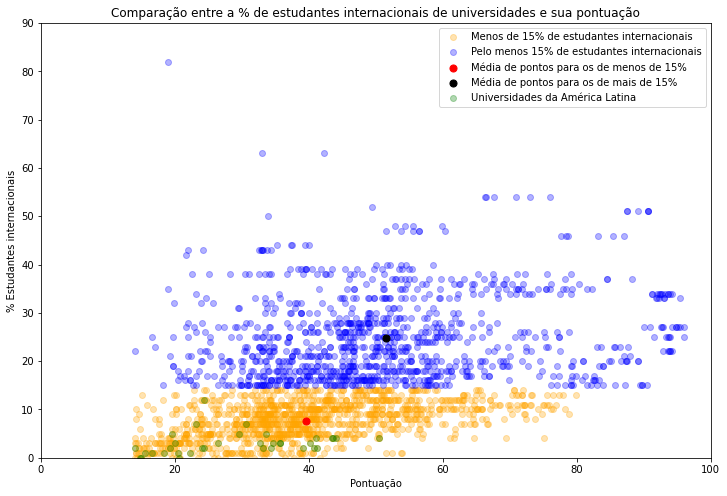

In [44]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.xlim((0,100))
plt.ylim((0,90))
plt.scatter(y=gp_A['international_students'],x=gp_A['total_score'],c='orange',alpha=alpha_v,label="Menos de 15% de estudantes internacionais")
plt.scatter(y=gp_B['international_students'],x=gp_B['total_score'],c='blue',alpha=alpha_v,label="Pelo menos 15% de estudantes internacionais")
plt.scatter(gp_A['total_score'].mean(),gp_A['international_students'].mean(),s=50,c="red",label="Média de pontos para os de menos de 15%")
plt.scatter(gp_B['total_score'].mean(),gp_B['international_students'].mean(),s=50,c="black",label="Média de pontos para os de mais de 15%")
plt.scatter(y=LTData['international_students'],x=LTData['total_score'],c='green',alpha=alpha_v,label="Universidades da América Latina")
plt.ylabel("% Estudantes internacionais")
plt.xlabel("Pontuação")
plt.legend()
plt.title("Comparação entre a % de estudantes internacionais de universidades e sua pontuação")

In [45]:
def bootstrap_mean(data, n=3000, frac=0.3):
    """
    Gera, via bootstrap, uma lista de médias de amostras dos dados informados
    data: O array de dado informado
    n: O número de amostras. Default: 3000
    frac: A proporção do tamanho das amostras dos dados. Exemplo e default: 0.3, ou seja, 30% dos dados em amostras
    """
    values = np.zeros(n)
    for i in range(n):
        sample = data.sample(int(frac*len(data)),replace=True)
        values[i] = sample.mean()
    return values

In [46]:
fracao_dados = 0.4
hist_A = bootstrap_mean(gp_A['total_score'],5000,fracao_dados)
hist_B = bootstrap_mean(gp_B['total_score'],5000,fracao_dados)

2.5% = 38.38198602794407 97.5% = 40.80873752495012


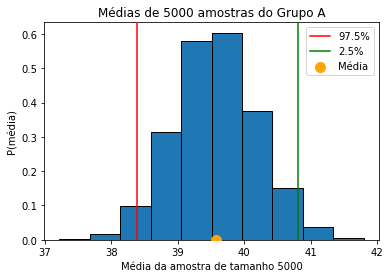

In [47]:
gpA_int = percentile(hist_A,2.5,97.5)
print("2.5% = {} 97.5% = {}".format(gpA_int[0],gpA_int[1]))
plt.hist(hist_A,density=True, edgecolor='black', linewidth=1.0,zorder=0)
plt.scatter(x=hist_A.mean(),y=0.0,s=100,c='orange',label="Média",zorder=10)
plt.ylabel('P(média)')
plt.xlabel('Média da amostra de tamanho 5000')
plt.title("Médias de 5000 amostras do Grupo A")
plt.axvline(x=gpA_int[0],c='red',label='97.5%',zorder=5)
plt.axvline(x=gpA_int[1],c='green',label='2.5%',zorder=5)
plt.legend()

2.5% = 49.88577906976743 97.5% = 53.2233081395349


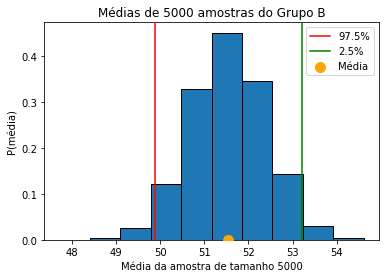

In [48]:
gpB_int = percentile(hist_B,2.5,97.5)
print("2.5% = {} 97.5% = {}".format(gpB_int[0],gpB_int[1]))

plt.hist(hist_B,density=True, edgecolor='black', linewidth=1.0,zorder=0)
plt.scatter(x=hist_B.mean(),y=0.0,s=100,c='orange',label="Média",zorder=10)
plt.axvline(x=gpB_int[0],c='red',label='97.5%',zorder=5)
plt.axvline(x=gpB_int[1],c='green',label='2.5%',zorder=5)
plt.ylabel('P(média)')
plt.xlabel('Média da amostra de tamanho 5000')
plt.title("Médias de 5000 amostras do Grupo B")
plt.legend()

Dessa forma, com 95% de certeza, ao analisarmos uma universidade com menos de 15% de alunos internacionais ela teria uma pontuação entre 38.41 e 40.75. Já ao analisarmos uma universidade com pelo menos 15% de alunos internacionais, ela teria uma pontuação entre 49.91  e 53.27 pontos. Isso é um sinal de que a porcentagem de estudantes internacionais influencia sim na pontuação final de universidades.

# P. 2 : Como cada atributo influencia na nota da universidade ?

Além das notas de cada requisito usado no cálculo final da nota das universidades (teaching, international, research, citations e income), temos outros dados sobre as universidades: num_students, student_staff_ratio, international_students, female_male_ratio.
    Já foi realizada uma análise específica para a porcentagem de alunos internacionais na universidade, porém, queremos saber como todas essas informações adicionais ajudam a prever a nota da unviersidade.

In [49]:
dfTimesCopy2 = dfTimesData.copy()

In [50]:
dfTimesCopy2 = dfTimesCopy2.drop(labels=['university_name','world_rank','country','teaching','international',
                         'research','citations','income','year'],axis=1)

In [51]:
dfTimesCopy2.head(3)

,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
0,96.1,20152,8.9,25,NaN
1,96,2243,6.9,27,33
2,95.5,11074,9.0,33,37


In [52]:
total_score.head(3)

NameError: name 'total_score' is not defined

## Normalizando os dados

In [53]:
dfTimesCopy2.dtypes

total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
dtype: object

In [54]:
dfTimesCopy2['num_students']= pd.to_numeric(dfTimesCopy2['num_students'])
dfTimesCopy2['international_students'] = pd.to_numeric(dfTimesCopy2['international_students'])
dfTimesCopy2['female_male_ratio'] = pd.to_numeric(dfTimesCopy2['female_male_ratio'])
dfTimesCopy2['total_score'] = pd.to_numeric(dfTimesCopy2['total_score'])

In [55]:
dfTimesCopy2.dtypes

total_score               float64
num_students              float64
student_staff_ratio       float64
international_students    float64
female_male_ratio         float64
dtype: object

In [56]:
dfTimesCopy2 = dfTimesCopy2.dropna()

In [57]:
dfTimesCopy2.head(3)

,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1,96.0,2243.0,6.9,27.0,33.0
2,95.5,11074.0,9.0,33.0,37.0
3,94.2,15596.0,7.8,22.0,42.0


Text(0.5, 1.0, ' Num. Estudantes X Pontuacao ')

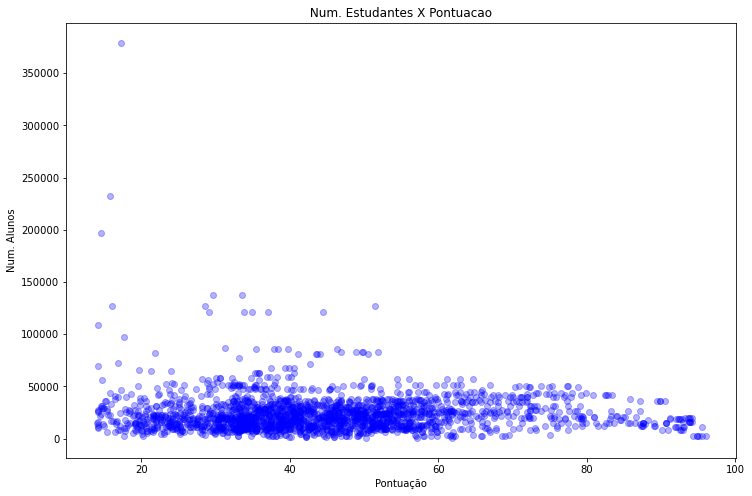

In [91]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['num_students'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("Num. Alunos")
plt.title(" Num. Estudantes X Pontuacao ")

Text(0.5, 1.0, '(Alunos/Funcionarios) X Pontuacao')

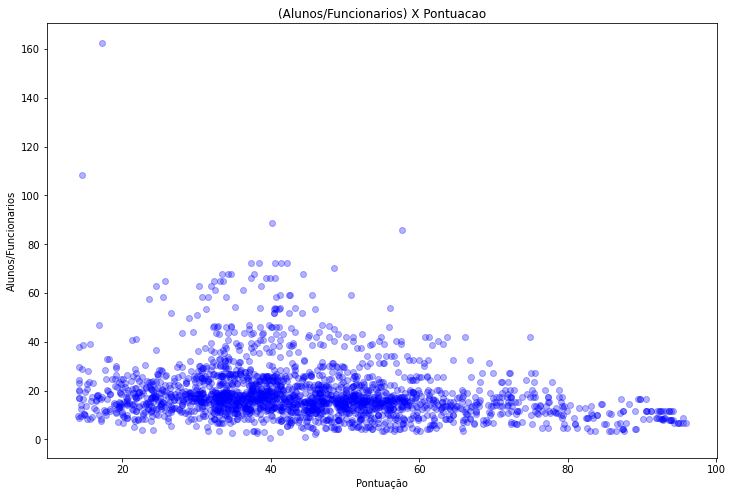

In [92]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['student_staff_ratio'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("Alunos/Funcionarios")
plt.title("(Alunos/Funcionarios) X Pontuacao")

Text(0.5, 1.0, '% Alunos internacionais X Pontuacao')

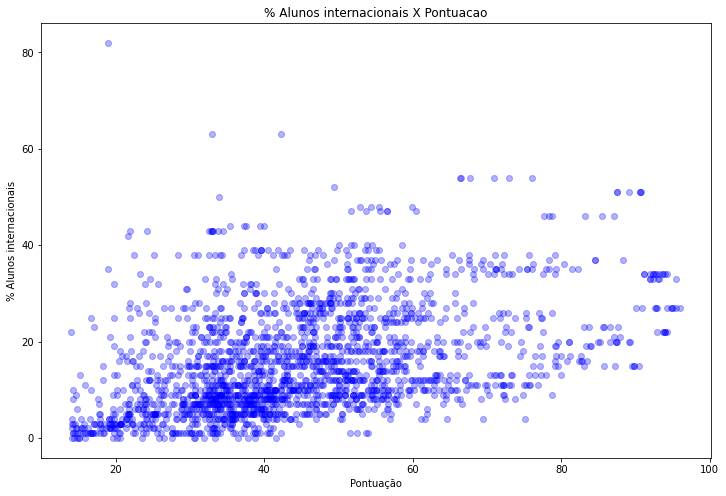

In [93]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['international_students'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("% Alunos internacionais")
plt.title("% Alunos internacionais X Pontuacao")

Text(0.5, 1.0, '% Alunos sexo feminino X Pontuacao')

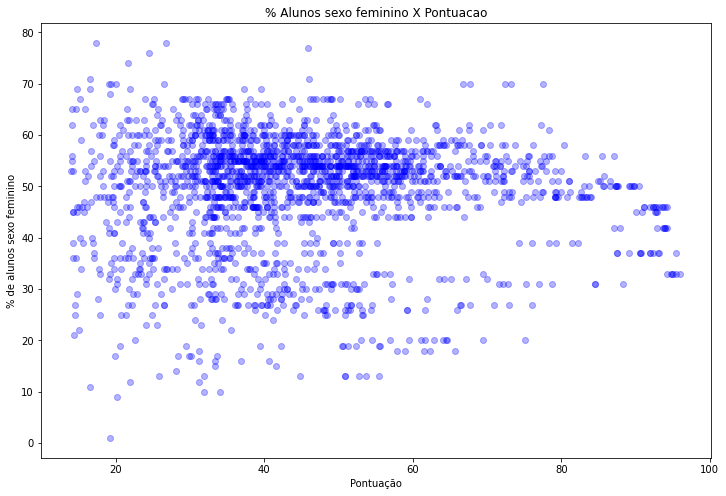

In [94]:
alpha_v = 0.3
plt.figure(figsize=(12,8))
plt.scatter(x=dfTimesCopy2['total_score'],y=dfTimesCopy2['female_male_ratio'],c='blue',alpha=alpha_v)
plt.xlabel("Pontuação")
plt.ylabel("% de alunos sexo feminino")
plt.title("% Alunos sexo feminino X Pontuacao")

In [64]:
def gradients(theta, X, y):
    # x : matriz nxm
    # y : array nx1
    # theta : array mx1
    return -2* ((y-X@theta)*X.T).mean(axis=1)


In [65]:
def descent(theta0, X, y, learning_rate=0.005, tolerance=0.0000001):
    theta = theta0.copy()
    old_err_sq = np.inf
    for i in range(1000):
        #Deriva e atualiza
        grad = gradients(theta,X,y)
        theta_novo = theta - learning_rate*grad
        err_sq = ((X.dot(theta)-y)**2).mean()
        
        if np.abs(err_sq - old_err_sq)<=tolerance:
            break
        theta = theta_novo
        old_err_sq = err_sq
    return theta

In [66]:
def sst(y):
    result = np.zeros(len(y))
    for i in range(len(y)):
        result[i] = y[i]**2
    return result.sum()

In [67]:
def predict(X, theta):
    return X@theta

In [68]:
def sse(X, y, theta):
    previsto = predict(X,theta)
    return ((y - previsto)**2).sum()

In [69]:
def r2(X, y, theta):
    sst_ = sst(y)
    sse_ = sse(X,y,theta)
    return (1 - (sse_/sst_))**2

In [70]:
y = dfTimesCopy2['total_score'].copy()
X = dfTimesCopy2[['num_students','student_staff_ratio','international_students','female_male_ratio']].copy()

x_mean = X.mean()
x_std = X.std(ddof=1)

y_mean = y.mean()
y_std = y.std(ddof=1)

X -= x_mean
X /= x_std
y -= y_mean
y /= y_std


# Acrescentamos uma coluna 0 correspondente ao intercepto (valor de y quando X=0)
X.insert(0, 'intercept', 1.0)

X = X.values
y = y.values


In [71]:
descent([1,1,1,1,1],X,y)

array([ 0.00106553,  0.13471296, -0.21330759,  0.43730969, -0.04281806])

In [72]:
r2(X,y,descent([1,1,1,1,1],X,y))

0.053177928165288275

In [73]:
previsto = predict(X,descent([1,1,1,1,1],X,y))
diferenca = y - previsto

In [74]:
"""
plt.scatter(y=diferenca,x=range(len(previsto)),c='orange',alpha=alpha_v,label="Pontuação prevista")
plt.ylabel("Real - Previsto")
plt.xlabel("Número da linha no dataframe")
plt.title("Diferença da nota prevista para cada universidade")
plt.figure(figsize=(9,13))
"""

'\nplt.scatter(y=diferenca,x=range(len(previsto)),c=\'orange\',alpha=alpha_v,label="Pontuação prevista")\nplt.ylabel("Real - Previsto")\nplt.xlabel("Número da linha no dataframe")\nplt.title("Diferença da nota prevista para cada universidade")\nplt.figure(figsize=(9,13))\n'

In [75]:
y = (y * y_std) + y_mean
previsto = (previsto * y_std) + y_mean

In [76]:
y

array([96. , 95.5, 94.2, ..., 14.6, 17.6, 21.3])

In [77]:
previsto

array([54.35091206, 58.49748383, 51.82193567, ..., 34.47545537,
       41.46975115, 35.07366819])

Text(0.5, 1.0, 'Erro da nota prevista para cada universidade')

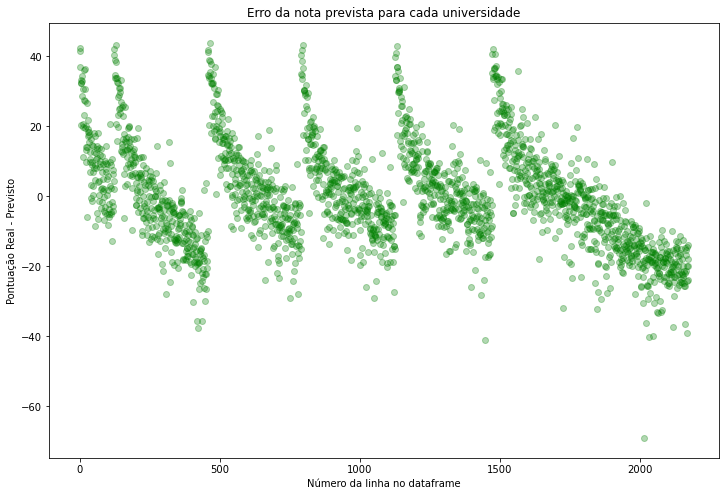

In [95]:
alpha_v = 0.3
diferenca = y - previsto
plt.figure(figsize=(12,8))
plt.scatter(y=diferenca,x=range(len(previsto)),c='green',alpha=alpha_v,label="Pontuação prevista")
plt.ylabel("Pontuação Real - Previsto")
plt.xlabel("Número da linha no dataframe")
plt.title("Erro da nota prevista para cada universidade")

Text(0.5, 1.0, 'Pontuação prevista x Pontuação Real')

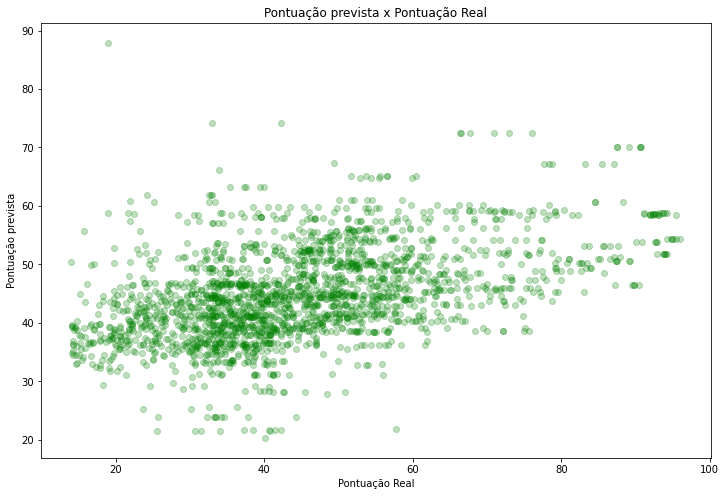

In [100]:
alpha_v = 0.25
plt.figure(figsize=(12,8))
plt.scatter(y=previsto,x=y,c='green',alpha=alpha_v,label="Pontuação prevista")
plt.xlabel("Pontuação Real")
plt.ylabel("Pontuação prevista")
plt.title("Pontuação prevista x Pontuação Real")

In [86]:
diferenca.std(ddof=1)

14.485405989127637

In [87]:
diferenca.mean()

-0.01759638202134519

In [88]:
np.percentile(diferenca,2.5)

-24.74350490103452

In [89]:
np.percentile(diferenca,97.5)

33.84943801971172

Usando a regressão múltipla, pudemos obter pesos para cada atributo analisado na nota de uma universidade: 0.13471296 para num_students, -0.21330759 para student_staff_ratio,  0.43730969 para international_students, -0.04281806 para female_male_ratio além de um intercepto de 0.00106553. 

Além disso, o R^2 da regressão ficou em 0.053177928165288275, oque é um número bem baixo e, portanto, ruim. De acordo com as notas previstas pela regressão, obtivemos um erro (nota real - nota prevista) com desvio padrão de 14.48 e média -0.017. De acordo com o intervalo de confiança com 95% de certeza, esse erro seria cerca de -24.74 a cerca de 33.84, número altos de erro para a pontuação.